In [31]:
import pandas as pd

# Load contig profiles and binning results.
# TODO: Make profiles and binning results the same for all algos.
profile = pd.read_csv("/Users/tanunia/PycharmProjects/biolab_scripts/canopy_profiles.in", sep=" ", header=None)
clusters = pd.read_csv("/Users/tanunia/PycharmProjects/biolab_scripts/canopy_binning.tsv", sep="\t", header=None)

# Add binning column to profile
clusters = clusters.rename(columns={1:'contig', 0:'color'})
cols = clusters.columns
clusters = clusters[cols[::-1]]
clusters["color"] = clusters["color"].apply(lambda x: int(x[3:]))
profile = profile.rename(columns={0:'contig'})
profile = pd.merge(clusters, profile, on='contig')
#profile

In [32]:
# Information about profile
profile.describe()

,color,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000,874229.000000
mean,114.345023,7.021815,9.682457,16.023759,12.826631,11.029218,9.773265,15.424325,12.309418,15.037634,11.235127,17.829746,19.183485,13.395388,19.277283,14.636003,11.643889
std,175.732041,22.349057,37.198960,35.921960,36.780672,36.521695,28.569736,45.451414,36.727628,38.228719,26.672553,32.773979,50.958231,34.555440,51.378334,27.745981,36.868664
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,0.000000
50%,61.000000,3.000000,2.000000,7.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,9.000000,9.000000,5.000000,7.000000,8.000000,4.000000
75%,127.000000,7.000000,8.000000,21.000000,12.000000,10.000000,9.000000,15.000000,10.000000,14.000000,12.000000,24.000000,20.000000,14.000000,18.000000,20.000000,11.000000
max,1899.000000,2962.000000,2890.000000,4656.000000,4791.000000,5243.000000,3941.000000,6316.000000,3737.000000,4412.000000,3137.000000,3693.000000,6464.000000,3996.000000,5213.000000,3440.000000,4765.000000


In [35]:
# Leave only clusters with significant contig length in profile

#CANOPY: bin_info$third_largest > 3 000 000
cag_str = "CAG0001 CAG0002 CAG0004 CAG0003 CAG0005 CAG0008 CAG0007 CAG0006 CAG0010 CAG0015 CAG0014 CAG0009 CAG0012 CAG0074 CAG0018 CAG0040 CAG0016 CAG0029 CAG0013 CAG0017 CAG0021 CAG0020 CAG0085 CAG0019 CAG0028 CAG0047 CAG0057 CAG0032 CAG0039 CAG0027 CAG0024 CAG0122 CAG0062 CAG0048 CAG0030 CAG0022 CAG0025 CAG0056 CAG0071 CAG0077 CAG0049 CAG0034 CAG0023 CAG0051 CAG0036 CAG0059"
filter1 = [int(x[3:]) for x in cag_str.split(" ")]
#CONCOCT: bin_info$third_largest > 20 000 000 
#filter1 = [89, 243, 312, 278, 109, 250, 60, 59, 195, 277, 190, 394, 311, 301, 333, 51, 143, 327, 338, 147, 256, 163, 18, 141, 134, 317, 81, 371, 288, 216, 388, 135, 71, 341, 367, 92, 232, 119, 252, 293, 361, 350, 168]
profile = profile[profile["color"].isin(filter1)]

# New profile info
profile.describe()

,color,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000,350711.000000
mean,21.828813,6.711198,12.784426,22.158333,16.605630,12.973206,11.563843,18.747259,14.536362,19.205451,13.463379,21.720180,23.329459,19.492075,28.524683,19.643273,17.859403
std,21.429488,17.495651,47.772374,29.768226,30.134884,21.407159,19.749674,28.541668,32.811062,27.869045,18.852696,21.706461,36.840619,32.843480,54.120753,19.491147,33.627913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,7.000000,6.000000,5.000000,6.000000,7.000000,3.000000
50%,15.000000,3.000000,4.000000,12.000000,7.000000,6.000000,6.000000,8.000000,6.000000,10.000000,9.000000,17.000000,13.000000,10.000000,14.000000,13.000000,7.000000
75%,30.000000,7.000000,12.000000,30.000000,15.000000,12.000000,10.000000,23.000000,13.000000,23.000000,18.000000,31.000000,29.000000,19.000000,28.000000,28.000000,21.000000
max,122.000000,922.000000,2890.000000,965.000000,1499.000000,1290.000000,1281.000000,1273.000000,1922.000000,1199.000000,1492.000000,925.000000,2252.000000,1641.000000,3422.000000,897.000000,2124.000000


In [36]:
# Get fraction of profile - profile_small. Normalize profile_small data (like in CONCOCT) and convert it to numpy array

import numpy as np

profile_small = profile.sample(frac=0.1)
data = profile_small.as_matrix(columns = profile.columns[2:])
v = (1.0/2000)
data = data + v
along_Y = np.apply_along_axis(sum, 0, data)
data = data/along_Y[None, :]
along_X = np.apply_along_axis(sum, 1, data)
data = data/along_X[:, None]
data = np.log(data)

In [37]:
# Run bht-sne
path_bhtsne = '/Users/tanunia/PycharmProjects/biolab_t-sne/'

# Save profile_small to tsv file
np.savetxt("data.in", data, delimiter="\t")

import sys, os
os.system(path_bhtsne + 'bhtsne.py -p 50 -m 1000 -i data.in -o data.out')

# Load coordinates from data.out
ar = np.loadtxt("data.out", delimiter="\t")
len(ar[:, 0])

# Save bhtsne result to profile_small
profile_small["x"] = ar[:, 0]
profile_small["y"] = ar[:, 1]

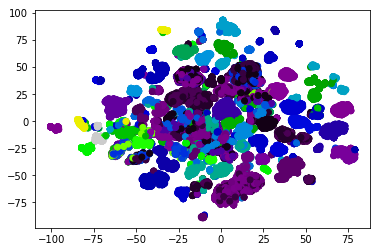

In [39]:
# Draw bhtsne result for a fraction of profile - profile_small

from matplotlib import pyplot as plt
import matplotlib.cm as cm

color = profile_small["color"].tolist()
mx_color = max(color)
plt.scatter(profile_small["x"], profile_small["y"], c=[cm.spectral(float(i) /mx_color) for i in color])
plt.show()

In [40]:
# Run PCA on profile_small
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaed = pca.fit(data).transform(data)
profile_small["x_pca"] = pcaed[:, 0]
profile_small["y_pca"] = pcaed[:, 1]

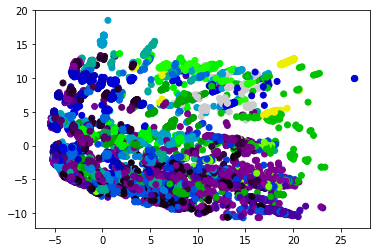

In [41]:
# Draw PCA for profile_small
plt.scatter(profile_small["x_pca"], profile_small["y_pca"], c=[cm.spectral(float(i) /mx_color) for i in color])
plt.show()

In [1]:
# Draw histogram with number of contigs in each bin
plt.hist(profile["color"], align='left', bins = 400)
plt.title("Number of contigs in each bin")
plt.show()

NameError: name 'plt' is not defined

In [44]:
# Look at mean frequencies in each sample for each bin
profile.groupby('color').mean()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
color,,,,,,,,,,,,,,,,
1,8.876186,18.261282,51.187960,6.134054,12.633700,5.477037,6.014585,5.304814,6.874191,12.439046,29.793732,22.665219,8.702589,11.272143,18.419851,3.956024
2,2.989724,1.488277,7.840371,21.469497,5.473986,6.484202,27.589086,8.524538,36.255537,13.439261,16.893876,16.096439,17.427745,16.574618,21.106419,25.184315
3,3.720807,12.429749,28.174160,5.869552,8.563257,5.155427,7.075434,5.348820,7.066567,11.246722,28.066567,20.510428,12.535407,14.223367,19.688710,5.910453
4,5.762003,1.769082,14.549234,30.423671,8.715794,9.015703,42.401146,11.751899,45.332861,20.204209,22.506758,23.953855,23.170228,23.510362,27.957910,33.567834
5,2.803744,2.260464,5.384254,9.709994,6.948961,2.923761,7.159026,2.579015,17.632118,6.025057,10.539294,11.215262,12.417924,20.254556,11.322110,21.699245
6,0.597182,11.346204,19.132968,8.455170,5.968345,7.536916,9.468041,6.318810,9.369510,12.423428,41.204192,28.746239,18.627272,21.547352,27.557788,10.249935
7,2.218029,10.157114,23.773194,5.336961,3.908277,5.085754,7.689371,4.638199,6.644870,9.314052,27.603528,21.129202,12.519881,14.149741,16.151058,8.002107
8,1.575741,10.346771,22.638090,5.676162,3.974290,5.669085,8.581475,4.796650,7.207829,9.250739,28.592135,22.005285,13.801397,15.090119,17.547433,8.376870
9,5.283090,17.775891,46.993908,6.290751,6.759553,4.634946,4.491508,3.912036,6.604947,5.856747,15.012368,18.485785,6.398652,8.899114,15.555289,4.008030


In [46]:
# Number of unique profiles in profile
len(-profile.groupby(profile.columns.tolist()[2:],as_index=False).size())

214731

In [47]:
# Make new dataframe - only unique profiles and run bhtsne on it
new_profile = profile.drop_duplicates(profile.columns.tolist()[2:])

In [48]:
new_profile.describe()

,color,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000,214731.000000
mean,22.129800,7.893974,14.111134,20.949183,18.048246,13.387517,12.819826,19.863946,16.551271,19.722951,13.629411,21.115116,24.002212,20.522281,29.781308,19.061570,17.828744
std,20.749713,20.238912,56.429132,31.039870,33.749958,22.096052,21.876617,30.797125,37.646332,29.446247,20.329130,22.523138,40.986660,34.669525,53.139510,20.306207,31.855980
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,7.000000,6.000000,4.000000,5.000000,7.000000,4.000000
50%,17.000000,3.000000,3.000000,9.000000,7.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,15.000000,12.000000,10.000000,13.000000,12.000000,7.000000
75%,32.000000,7.000000,10.000000,28.000000,17.000000,12.000000,11.000000,25.000000,13.000000,23.000000,18.000000,30.000000,27.000000,19.000000,30.000000,27.000000,22.000000
max,122.000000,922.000000,2890.000000,965.000000,1499.000000,1290.000000,1281.000000,1273.000000,1922.000000,1199.000000,1492.000000,925.000000,2252.000000,1641.000000,3422.000000,897.000000,2124.000000


In [27]:
new_profile = new_profile.sample(frac=0.1)
data = new_profile.as_matrix(columns = new_profile.columns[2:])
v = (1.0/2000)
data = data + v
along_Y = np.apply_along_axis(sum, 0, data)
data = data/along_Y[None, :]
along_X = np.apply_along_axis(sum, 1, data)
data = data/along_X[:, None]
data = np.log(data)

In [49]:
np.savetxt("data2.in", data, delimiter="\t")

path_bhtsne = '/Users/tanunia/PycharmProjects/biolab_t-sne/'
import sys, os
os.system(path_bhtsne + 'bhtsne.py -p 50 -m 3000 -i data2.in -o data_canopy2.out')

ar2 = np.loadtxt("data2.out", delimiter="\t")
len(ar2[:, 0])

new_profile["x"] = ar2[:, 0]
new_profile["y"] = ar2[:, 1]

ValueError: Length of values does not match length of index

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(new_profile["x"], new_profile["y"], c=new_profile["color"])
plt.show()

In [ ]:
new_profile["color"].value_counts()